In [1]:
%matplotlib inline
from datetime import datetime
import pandas as pd
import numpy as np
import csv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

/Users/Iris/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df1 = pd.read_csv("airbnb_preprocessed1.csv")
df2 = pd.read_csv("reviews.csv")
new_table = dict()
for index, row in df2.iterrows():
    id = row['listing_id']
    value = dict()
    value["review"] = ""
    value["price"] = 0
    value["reviewscore_rating"] = 0.0
    value["count"] = 0
    new_table[id] = value

In [3]:
print(df2.columns)

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


In [4]:
for index, row in df2.iterrows():
    id = row['listing_id']
    if new_table[id]["count"] <= 20:
        new_table[id]["count"] += 1
        new_table[id]["review"] += str(row['comments'])
for index, row in df1.iterrows():
    id = row['id']
    if id in new_table.keys():
        new_table[id]['price'] = row['price_class']
        new_table[id]["reviewscore_rating"] = row["reviewscore_rating"]
print(new_table)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
review = []
id = []
price = []
rating = []
for key in new_table.keys():
    id.append(key)
    price.append(new_table[key]['price'])
    rating.append(new_table[key]["reviewscore_rating"])
    review.append(new_table[key]["review"])
new_df = pd.DataFrame()
new_df['id'] = id
new_df['price_class'] = price
new_df['rating_score'] = rating
new_df['reviews'] = review
print(new_df.shape)
print(new_df)

(3986, 4)
            id  price_class  rating_score  \
0      7441144            1          88.0   
1     12233830            1          95.0   
2     14586440            4          90.0   
3     20704205            3         100.0   
4      6291807            2         100.0   
5     15444930            2          90.0   
6      1596470            2         100.0   
7      8211468            4          97.0   
8     19824694            4         100.0   
9      8063815            4         100.0   
10     8082512            5          88.0   
11    14767573            3         100.0   
12    20726840            2          87.0   
13    17526985            1          91.0   
14    13707814            4          92.0   
15     4644069            4         100.0   
16    16322051            3          99.0   
17    11202183            4          97.0   
18    20989824            5         100.0   
19     3294775            2          92.0   
20    15410121            1          98.0   


In [6]:
df_1 = new_df[new_df.price_class == 1]
df_3 = new_df[new_df.price_class == 3]
df_5 = new_df[new_df.price_class == 5]
reviews_1 = ""
reviews_3 =""
reviews_5 =""
neg_1 = 0
neg_3 = 0
neg_5 = 0
for index, row in df_1.iterrows():
    reviews_1 += row["reviews"]
    if row['rating_score'] < 80:
        neg_1 += 1
for index, row in df_3.iterrows():
    reviews_3 += row["reviews"]
    if row['rating_score'] < 80:
        neg_3 += 1
for index, row in df_5.iterrows():
    reviews_5 += row["reviews"]
    if row['rating_score'] < 80:
        neg_5 += 1

In [7]:
from nltk.corpus import stopwords

def word_count(input):
#     words = nltk.word_tokenize(input)
    StopWords = stopwords.words("english")
    words = re.findall(r'\w+', input)
    words_lower = [word.lower() for word in words if word.strip() not in StopWords]
    words_lower = [word.lower() for word in words_lower if word.strip() not in StopWords]
    words_counts = Counter(words_lower)
    return words_counts.most_common(50)

In [8]:
# print(StopWords)
print(word_count(reviews_1))
print(word_count(reviews_3))
print(word_count(reviews_5))

[('great', 5169), ('place', 4789), ('stay', 4526), ('boston', 3639), ('clean', 3446), ('nice', 2617), ('room', 2554), ('host', 2502), ('apartment', 2465), ('location', 2378), ('would', 2340), ('us', 2303), ('house', 2278), ('comfortable', 2058), ('good', 1736), ('easy', 1686), ('recommend', 1668), ('really', 1603), ('everything', 1557), ('home', 1494), ('close', 1406), ('time', 1364), ('well', 1275), ('definitely', 1234), ('also', 1201), ('walk', 1149), ('neighborhood', 1131), ('perfect', 1072), ('get', 1064), ('helpful', 1016), ('area', 979), ('friendly', 960), ('quiet', 954), ('one', 916), ('made', 909), ('check', 868), ('even', 860), ('kitchen', 838), ('needed', 834), ('experience', 834), ('like', 824), ('station', 803), ('staying', 801), ('downtown', 798), ('parking', 779), ('space', 771), ('wonderful', 761), ('convenient', 738), ('city', 736), ('family', 728)]
[('great', 6085), ('stay', 4772), ('place', 4688), ('boston', 4152), ('apartment', 3527), ('clean', 3279), ('location', 32

In [9]:
print(neg_1 / df_1.shape[0])
print(neg_3 / df_3.shape[0])
print(neg_5 / df_5.shape[0])

0.06212664277180406
0.049878345498783457
0.034383954154727794


We can see from the result that the comments are barely relavated to the price level, adjective words like"clean", "comfortable", "good" are the most common words is comments. We can infer from that customers are quite satisfied with the quality of living condition of airbnb houses of Boston. Another intersting thing to notice that, the negative review ratio of the most expensive room is the highest, then the medium, the cheapest room get the lowest negative review ratio, which is quite surprizing.

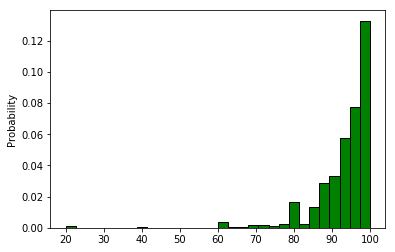

In [ ]:
labels = ['rating score < 80', 'rating score 80 - 90', 'rating score 90 - 95', 'rating score 95 - 100']
new_df = new_df[new_df.rating_score > 0]
sizes = [new_df[new_df.rating_score < 80].shape[0], 
        new_df[(new_df.rating_score >= 80) & (new_df.rating_score < 90)].shape[0], 
        new_df[(new_df.rating_score >= 90) & (new_df.rating_score < 95)].shape[0],
        new_df[(new_df.rating_score >= 95) & (new_df.rating_score < 100)].shape[0]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
x = new_df['rating_score']
plt.hist(x, bins=30,facecolor = 'green', normed=1,edgecolor='k')
plt.ylabel('Probability');
plt.show()

In [ ]:
# wordcloud of all the reviews in boston
all_reviews = reviews_1 + reviews_3 + reviews_5
StopWords = stopwords.words("english")
words = re.findall(r'\w+', all_reviews)
words_lower = [word.lower() for word in words if word.strip() not in StopWords]
all_review_cleaned = ' '.join([word.lower() for word in words_lower if word.strip() not in StopWords])
wordcloud = WordCloud(width = 1000, height = 700).generate(all_review_cleaned)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# wordcloud of lower rated room
neg_df = new_df[new_df.rating_score > 0]
neg_df = neg_df[neg_df.rating_score < 80]
neg_review = ""
for index, row in neg_df.iterrows():
    neg_review += row["reviews"]
words = re.findall(r'\w+', neg_review)
StopWords = stopwords.words("english")
words_lower = [word.lower() for word in words if word.strip() not in StopWords]
neg_review_cleaned = ' '.join([word.lower() for word in words_lower if word.strip() not in StopWords])
words_lower = [word.lower() for word in words_lower if word.strip() not in StopWords]
words_counts = Counter(words_lower)
# print(words_counts.most_common(50))
wordcloud = WordCloud(width = 1000, height = 700).generate(neg_review_cleaned)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# wordcloud of high rated room
pos_df = new_df[new_df.rating_score > 95]
pos_review = ""
for index, row in pos_df.iterrows():
    pos_review += row["reviews"]
words = re.findall(r'\w+', pos_review)
words_lower = [word.lower() for word in words if word.strip() not in StopWords]
pos_review_cleaned = ' '.join([word.lower() for word in words_lower if word.strip() not in StopWords])
words_lower = [word.lower() for word in words_lower if word.strip() not in StopWords]
words_counts = Counter(words_lower)
# print(words_counts.most_common(50))
wordcloud = WordCloud(width = 1000, height = 700).generate(pos_review_cleaned)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()